# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [33]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [34]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [35]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
import seaborn as sns

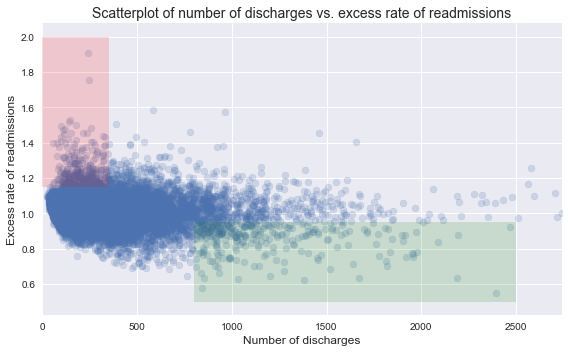

In [37]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

<h3>First, some exploration: </h3>

create a column that measures the total days in the hospital

In [38]:
clean_hospital_read_df['End Date'] = pd.to_datetime(clean_hospital_read_df['End Date'])

In [39]:
clean_hospital_read_df['Start Date'] = pd.to_datetime(clean_hospital_read_df['Start Date'])

In [40]:
clean_hospital_read_df['Days In'] = clean_hospital_read_df['End Date'] - clean_hospital_read_df['Start Date']

Booo, seems like the dataset only has 1 date interval

In [41]:
clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date', 'Days In'],
      dtype='object')

In [42]:
toplot = clean_hospital_read_df.loc[:,[
       'Number of Discharges', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions']].dropna(how = 'any')

SHow a pairplot to get an overview of all the possible correlations

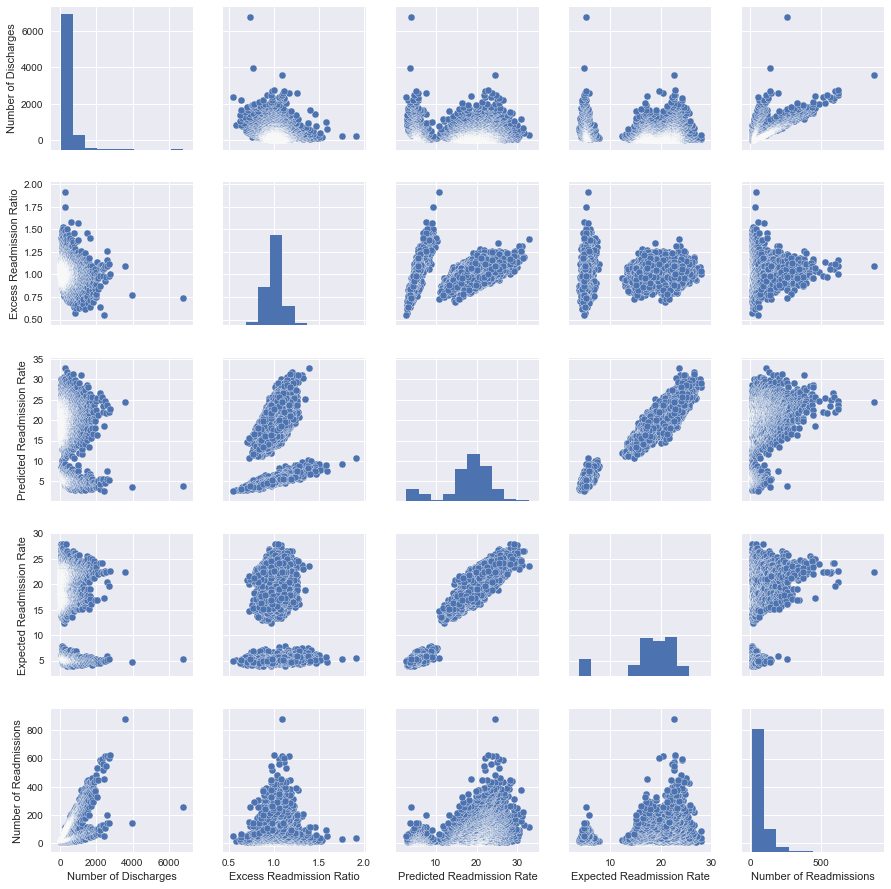

In [43]:
sns.pairplot(toplot)

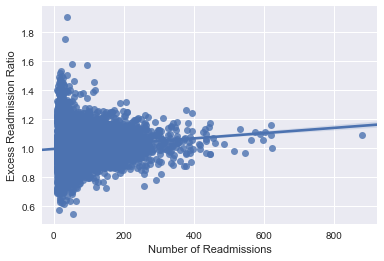

In [44]:
sns.regplot(y="Excess Readmission Ratio", x="Number of Readmissions", data=clean_hospital_read_df, fit_reg = True)

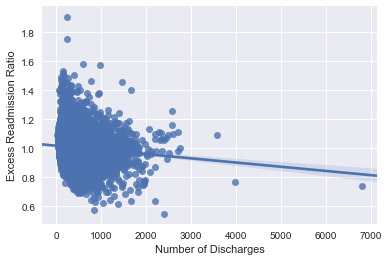

In [45]:
sns.regplot(y="Excess Readmission Ratio", x="Number of Discharges", data=clean_hospital_read_df, fit_reg = True)

<h2> A. Do you agree with the above analysis and recommendations? Why or why not?</h2>

Yes, there is a negative linear correlation between excess ratio and number of discharges. However I don’t think that this is the key differentiator. If it was, I would think that we would want more discharges to decrease the excess rate, but doing that could lead to an undesired effect of increased excess readmission as patients will be pushed out faster through the hospital without properly recovering, ending up back in the hospital.<br/><br/>
I do agree that there is a significant correlation between hospital capacity (number of discharges) and readmission rates. We can test this significance (see calculations below).<br/><br/>
I’m more curious in looking into how location effects the excess rate, as there are other factors that go into this, such as population density, density of hospitals in state, state regulations, etc. Additionally, it is likely that the hospitals with more discharges are in more densely populated areas. Thus, it might be worth looking into location as a factor, rather than the symptom (larger number of discharges). The analysis below looks at the data from this location-based perspective.


LEt's Test the statement that there is a significance to number of discharges and excess readmission ratio. <br/>

    
•	In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

create a size column to test hypothesis

In [46]:
import scipy.stats as stats
import math

In [86]:
clean_hospital_read_df['Size'] = pd.Series()
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<=100]
big = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>100]

In [87]:
big = big.dropna(how='any',subset=['Excess Readmission Ratio'])
small = small.dropna(how='any',subset=['Excess Readmission Ratio'])

<h2>B. Provide support for your arguments and your own recommendations with a statistically sound analysis:</h2>

Let's TEST THIS CONCLUSION In plotly using t-test<br/>
<b>null hypothesis:</b> that the samples (hospitals with big and small discharge numbers) have the same true mean, and thus discharge rate has NO effect on excess readmission ratio<br/>
<b>Alternate hypothesis:</b> that they do not have identical true means and that the discharge rate DOES have an effect on excess readmission rate.<br/>
alpha = 0.5%

In [100]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
py.sign_in('aguerra14', 'ogygYT7QEYcFkH725V9E')


In [97]:
twosample_results = scipy.stats.ttest_ind(big['Excess Readmission Ratio'], small['Excess Readmission Ratio'])

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

With this p-value and t-statistic, we see that we can reject the null hypothesis and affirm that discharge rate has a significant effect on the excess readmission rate.

In [ ]:
could look at state corellations - california has most
but divide by # of hospitals in that state - average excess
also look at the # of days in the hospital, but the dataset only has 1 date

<h3>Compute and report the observed significance value (or p-value).</h3>

See table above

<h3>Report statistical significance for  αα  = .01.  </h3>

Even with alpha = 0.01, the p-value is much less and the significance still holds

<h3>Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?  </h3>

Statistical significance tells us whether or not the sampling is adequate enough such that the sample is a good representation of the population, which can be measured in difference of means.<br/>
Practical significance tells use whether or not this difference in sample and population is big enough to make a difference in what we care to observe.

<h3>Look at the scatterplot above. </h3>
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.


Scatter plots are great to show clusters and correlations. It's a always a good idea to do this to get a high level understanding of the data and a great way to start the data exploration. <br/><br/>
see above, reg plots to show correlations. 